In [92]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import datetime
import numpy as np

## Plotting Arrangements

### General Structure

#### By Expiration ATM
- Option Type (P / C / P & C)
- Exact DOE / TTE Period (1M / 3M / 6M / 1Y / 1Y6M / 2Y / Max) / Full Normal Cycles (No weeklys) / Weeklys
- Metric: Nominal Price / OI / Vol / IV / delta / gamma / vega / theta / rho

#### By Strike Price (EXP)
- Option Type (P / C / P & C)
- Strike Range (numerical range, full)
- Exact DOE / TTE Period (1M / 3M / 6M / 1Y / 1Y6M / 2Y / Max) / Full Normal Cycles (No weeklys) / Weeklys
- Metric: Nominal Price / OI / Vol / IV / delta / gamma / vega / theta / rho


In [93]:
ticker = 'SPY'

In [113]:
class PlottingHelper:

    # Constructs and returns the horzontal axis containing Date of Expiration values.
    # Date selection based on the mode chosen.
    
    # Mode: Exact, Range, Regular, Weeklies

    def getDoeAxis(self, mode, args):

        # Exact + Args: date in Y-M-D format
        if (mode == 'exact') and (args != 0) and (type(args) == type.__str__):
            return

        # else:
            # ERROR Handling: Missing / Incorrect Argument: ARGS
            # yield


        # Range + (1M / 3M / 6M / 1Y / 1Y6M / 2Y / Max) as String
        if (mode == 'range') and (args != 0):

            match args:

                case '1M':
                    return

                case '3M':
                    return

                case '6M':
                    return

                case '1Y':
                    return

                case '1Y6M':
                    return

                case '2Y':
                    return

                case '3Y':
                    return

                case 'MAX':
                    
                    print("ochkozavr")

                    expirations_all = os.listdir(path = '../Data/' + ticker)

                    # Filter dates past today:
                    # Check year - this year >= 0
                    # Check month - this month >= 0
                    # Check day - this day >= 0

                    valid_expirations = []
                    today_y = datetime.datetime.today().strftime('%y')
                    today_m = datetime.datetime.today().strftime('%m')
                    today_d = datetime.datetime.today().strftime('%d')

                    for each in expirations_all:

                        # Add expirations in the current month past today
                        if each not in valid_expirations and int(pd.to_datetime(each).strftime('%y')) == int(today_y) and int(pd.to_datetime(each).strftime('%m')) == int(today_m) and int(pd.to_datetime(each).strftime('%d')) >= int(today_d):
                            valid_expirations.append(each)
                        
                        # Add current year and months beyond current
                        if int(pd.to_datetime(each).strftime('%y')) == int(today_y) and int(pd.to_datetime(each).strftime('%m')) > int(today_m):
                            valid_expirations.append(each)
                            
                        # Add the following years
                        if each not in valid_expirations and int(pd.to_datetime(each).strftime('%y')) > int(today_y):
                            valid_expirations.append(each)

                    valid_expirations_sorted = pd.to_datetime(valid_expirations).sort_values()
                    valid_expirations_sorted = valid_expirations_sorted.to_pydatetime()
                    
                    return valid_expirations_sorted

                # Defaults to Maximum
                case _:
                    return


        # Quarterlies
        if (mode == 'quarterly'): 
            return


        # Weeklies
        if (mode == 'weekly'): 
            return

    

    # 
    def isThirdFriday(doe_string):
        yield


    # January - 1 / February - 2 / March - 3
    def getCycle(doe_string):
        yield


    #
    def isQuarterly():
        yield


    # 
    def isMonthly():
        yield


    #
    def isWeekly():
        yield

In [114]:
class PlottingMain:

    # Plots specified metrics for ATM options according to specified Option Type / DOE settings
    # 
    # Expected Input:
    # o_type: Contract Type: C / P / C & P
    # DOE Type: Exact, Range, Regular, Weeklies + ARGS in a LIST
    # metric: string
    
    # Retrieve ATM data as the first element in [Type][ITM = True]

    def plotDoeATM(o_type, doe_type, metric, atm_price):


        # Helper Instance Initialized
        # plotHelper = PlottingHelper()

        plotHelper = PlottingHelper()

        # GET THE X AXIS
        axis_type, axis_range = doe_type

        doe_axis = plotHelper.getDoeAxis(axis_type, axis_range)

        print(doe_axis)

        data_axis = dict()

        for each in doe_axis:

            indir = '../Data/' + ticker + '/' + str(each.year) + '-' + str(each.month) + '-' + str(each.day) + '/'
            list = os.listdir(path = indir)
            list_paths = [indir + filename for filename in list]

            newest = max(list_paths, key = os.path.getctime)

            # Reads in the CSV for the corresponding DOEs:
            data = pd.read_csv(newest, sep = ',')
            data = data[data.Type == o_type][data.strike == atm_price][metric]

            data_axis[str(each.year) + '-' + str(each.month) + '-' + str(each.day)] = data

        list_axis = []
        list_values = []
        
        for each1 in [str(each.year) + '-' + str(each.month) + '-' + str(each.day) for each in doe_axis]:

            # Handling empty lists of values
            if(len(data_axis[each1].values) != 0):
                list_axis.append(each1)
                list_values.append(data_axis[each1].iloc[0])

        plt.figure(figsize = (43, 10))
        plt.plot(list_axis, list_values)



    # Plots Multiple Curves (Different Expiration Dates) for the specified strike range
    def plotDoeStrike():
        yield


ochkozavr
[datetime.datetime(2022, 4, 11, 0, 0) datetime.datetime(2022, 4, 13, 0, 0)
 datetime.datetime(2022, 4, 14, 0, 0) datetime.datetime(2022, 4, 18, 0, 0)
 datetime.datetime(2022, 4, 20, 0, 0) datetime.datetime(2022, 4, 22, 0, 0)
 datetime.datetime(2022, 4, 25, 0, 0) datetime.datetime(2022, 4, 27, 0, 0)
 datetime.datetime(2022, 4, 29, 0, 0) datetime.datetime(2022, 5, 2, 0, 0)
 datetime.datetime(2022, 5, 4, 0, 0) datetime.datetime(2022, 5, 6, 0, 0)
 datetime.datetime(2022, 5, 9, 0, 0) datetime.datetime(2022, 5, 13, 0, 0)
 datetime.datetime(2022, 5, 20, 0, 0) datetime.datetime(2022, 6, 17, 0, 0)
 datetime.datetime(2022, 6, 30, 0, 0) datetime.datetime(2022, 7, 15, 0, 0)
 datetime.datetime(2022, 8, 19, 0, 0) datetime.datetime(2022, 9, 16, 0, 0)
 datetime.datetime(2022, 9, 30, 0, 0)
 datetime.datetime(2022, 12, 16, 0, 0)
 datetime.datetime(2022, 12, 30, 0, 0)
 datetime.datetime(2023, 1, 20, 0, 0) datetime.datetime(2023, 3, 17, 0, 0)
 datetime.datetime(2023, 3, 31, 0, 0) datetime.dateti

/var/folders/px/x01_dz0s2pg80y1jr97km6bh0000gn/T/ipykernel_68374/1416647011.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[data.Type == o_type][data.strike == atm_price][metric]
/var/folders/px/x01_dz0s2pg80y1jr97km6bh0000gn/T/ipykernel_68374/1416647011.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[data.Type == o_type][data.strike == atm_price][metric]
/var/folders/px/x01_dz0s2pg80y1jr97km6bh0000gn/T/ipykernel_68374/1416647011.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[data.Type == o_type][data.strike == atm_price][metric]
/var/folders/px/x01_dz0s2pg80y1jr97km6bh0000gn/T/ipykernel_68374/1416647011.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[data.Type == o_type][data.strike == atm_price][metric]
/var/folders/px/x01_dz0s2pg80y1jr97km6bh0000gn/T/ipykernel_68374/1416647011.py:39: UserW

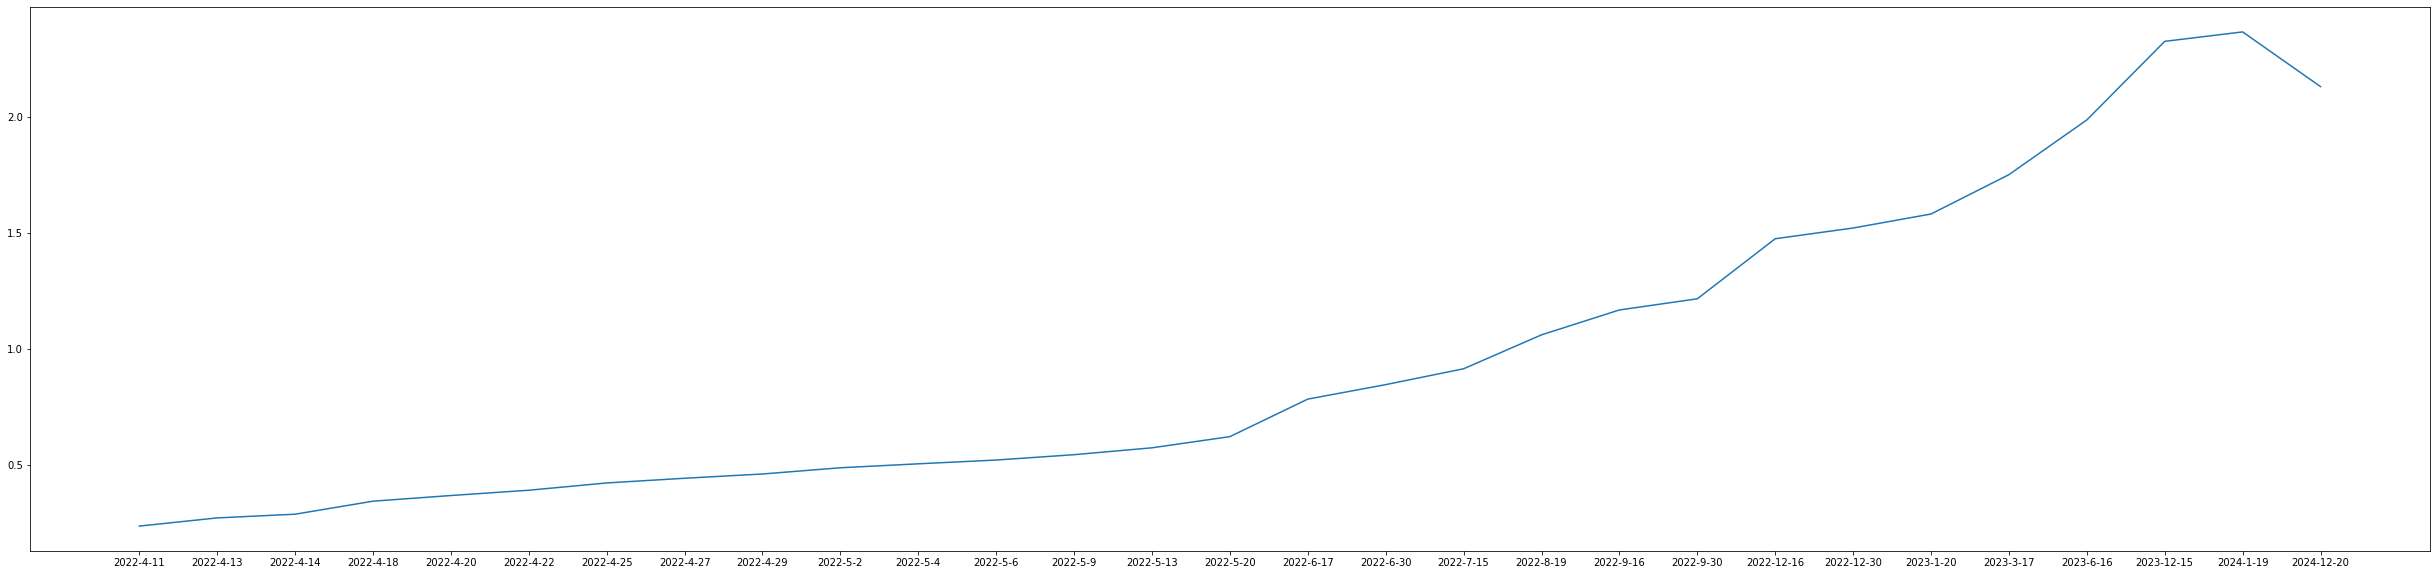

In [115]:
PlottingMain.plotDoeATM('C', ['range', 'MAX'], 'vega', 500)